In [2]:
import logging
import geopandas as gpd
import matplotlib.pyplot as plt
from sliderule import icesat2

In [3]:
# Configure ICESat-2 API
icesat2.init("slideruleearth.io", False)
# Configure Region of Interest
region = [ {"lon":-105.82971551223244, "lat": 39.81983728534918},
           {"lon":-105.30742121965137, "lat": 39.81983728534918},
           {"lon":-105.30742121965137, "lat": 40.164048017973755},
           {"lon":-105.82971551223244, "lat": 40.164048017973755},
           {"lon":-105.82971551223244, "lat": 39.81983728534918} ]

In [4]:
region

[{'lon': -105.82971551223244, 'lat': 39.81983728534918},
 {'lon': -105.30742121965137, 'lat': 39.81983728534918},
 {'lon': -105.30742121965137, 'lat': 40.164048017973755},
 {'lon': -105.82971551223244, 'lat': 40.164048017973755},
 {'lon': -105.82971551223244, 'lat': 39.81983728534918}]

In [8]:
# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

# Request ATL06 Data
gdf = icesat2.atl06p(parms)

# Display Statistics
print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
print("Cycles: {}".format(gdf["cycle"].unique()))
print("Received {} elevations".format(len(gdf)))

Reference Ground Tracks: [554 973 996  28  51]
Cycles: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Received 236492 elevations


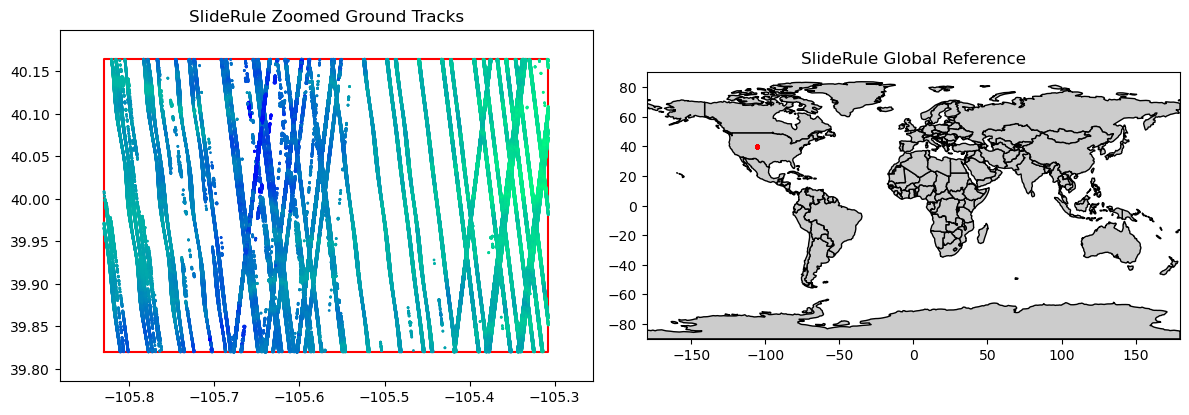

In [9]:


# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,(ax1,ax2) = plt.subplots(num=None, ncols=2, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1.set_title("SlideRule Zoomed Ground Tracks")
gdf.plot(ax=ax1, column=gdf["h_mean"], cmap='winter_r', s=1.0, zorder=3)
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
ax1.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax1.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax1.set_aspect('equal', adjustable='box')

# Plot SlideRule Global View
ax2.set_title("SlideRule Global Reference")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax2, color='0.8', edgecolor='black')
gdf.plot(ax=ax2, marker='o', color='red', markersize=2.5, zorder=3)
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout()

In [10]:
gdf.head()

,pflags,rgt,distance,spot,segment_id,gt,n_fit_photons,h_mean,dh_fit_dy,cycle,dh_fit_dx,rms_misfit,w_surface_window_final,h_sigma,geometry
time,,,,,,,,,,,,,,,
2018-11-03 21:32:48.898868992,0,554,4.445026e+06,1,221652,60,58,2597.144754,0.0,1,-0.020653,0.160731,3.0,0.031434,POINT (-105.82170 39.95098)
2018-11-03 21:32:48.901681152,0,554,4.445046e+06,1,221653,60,112,2596.792214,0.0,1,-0.016214,0.162026,3.0,0.015863,POINT (-105.82172 39.95116)
2018-11-03 21:32:48.904496896,0,554,4.445066e+06,1,221654,60,105,2596.592370,0.0,1,-0.006208,0.173778,3.0,0.017858,POINT (-105.82174 39.95134)
2018-11-03 21:32:48.907323648,0,554,4.445086e+06,1,221655,60,62,2596.585263,0.0,1,0.003789,0.173715,3.0,0.036887,POINT (-105.82176 39.95152)
2018-11-03 21:32:48.938292992,0,554,4.445306e+06,1,221666,60,25,2592.975265,0.0,1,-0.014491,0.146838,3.0,0.039454,POINT (-105.82202 39.95350)


In [12]:
gdf.length()

/tmp/ipykernel_2819/1300618885.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.length()


TypeError: 'Series' object is not callable

In [13]:
len(gdf)

236492